<a href="https://colab.research.google.com/github/atorras1618/Miscellaneous-TDA-notebooks/blob/main/Brief_Introduction_to_Persistent_Homology_using_scikit_tda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Persistent Homology using `scikit-tda` and `GUDHI`

Notebook written by Álvaro Torras Casas, Cardiff University, Michaelmass 2022

We will be using the `scikit-tda` and `gudhi` libraries through this notebook. The documentation for these can be found:

https://scikit-tda.org/

<img src=https://scikit-tda.org/_static/logo.png width="150">

https://gudhi.inria.fr/

<img src=https://gudhi.inria.fr/images/gudhi_banner.jpg width="230">

Through this notebook we use some original images from the `scikit-tda` and `gudhi` libraries.

To run the selected cell and select the next cell, press `shift`+ `enter`


Let's start by installing some dependencies. The `!` in front of a command indicates that it is a command prompt line (not Python code).

In [ ]:
!pip install tadasets
!pip install gudhi
!pip install ripser
!pip install persim

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import timeit

import tadasets

### Data Examples with `tadasets.py`

<img src=https://scikit-tda.org/_images/tadasets.png width="120"> 

In this notebook, we will review some of the common filtered complexes used in TDA. 

Let us get some sample points about a swiss roll

In [3]:
infty_pts = tadasets.infty_sign(30, noise=0.05)

**Tips:** The python `help()` command is useful when we are unsure of what a function does. Also, pressing the tab key after typing `tadasets.` gives us the different functions and classes of the `tadasets.py` module. 

In [4]:
help(tadasets.infty_sign)

Help on function infty_sign in module tadasets.shapes:

infty_sign(n=100, noise=None)
    Construct a figure 8 or infinity sign with :code:`n` points and noise level with :code:`noise` standard deviation.
    
    Parameters
    
    n: int
        number of points in returned data set.
    noise: float
        standard deviation of normally distributed noise added to data.



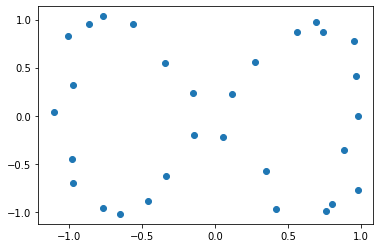

In [5]:
plt.scatter(infty_pts[:,0], infty_pts[:,1])

In [6]:
torus_pts = tadasets.torus(300)

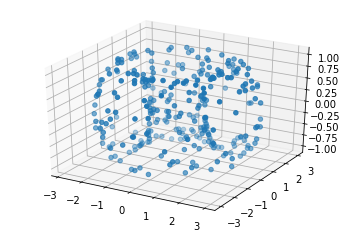

In [7]:
tadasets.view.plot3d(torus_pts)

In [8]:
help(tadasets.view.plot3d)

Help on function plot3d in module tadasets.view:

plot3d(data, fig=None, ax=None, **params)



### Compute Cech complexes


**Ignore the Cechmate module for installation problems**

`Cechmate` is an interface for the PHAT C++ module: https://github.com/blazs/phat

https://cechmate.scikit-tda.org/en/latest/notebooks/BasicUsage.html

<img src=https://scikit-tda.org/_images/cechmate.png width=120>

As this module is not working, we can comment several lines using `ctrl`+`/` (notice that `/` is pressed in the numpad)

In [9]:
# import cechmate as cm

# cech_1 = cm.Cech(maxdim=1)
# cech_1

# infty_cpx = cech_1.build(infty_pts)

# cechdgms = cech_1.diagrams(infty_cpx)

# N = 40
# M = 50
# infty_cpx[N:M] # print simplices between N < M from the Cech filtration

# plot_diagrams(cechdgms, labels = ['$H_0$ Cech', '$H_1$ Cech'])
# plt.show()

### Compute Alpha complexes using `GUDHI`

In [10]:
import gudhi as gd

In [11]:
from gudhi import AlphaComplex
ac = AlphaComplex(points=infty_pts)
stree = ac.create_simplex_tree()
alphadgms = stree.persistence()

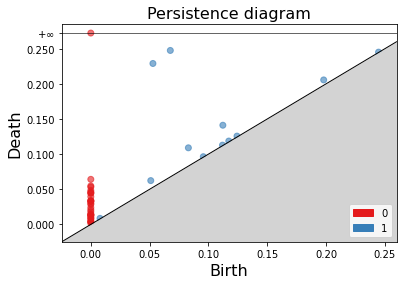

In [12]:
gd.plot_persistence_diagram(alphadgms, legend = True)
plt.show()

### Compute Vietoris-Rips complexes using `ripser.py`

Next, let us use `Ripser`to compute the persistent homology associated to Vietoris-Rips complexes

<img src=https://scikit-tda.org/_images/ripser.png width=120>

https://github.com/scikit-tda/ripser.py

In [13]:
from ripser import Rips

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


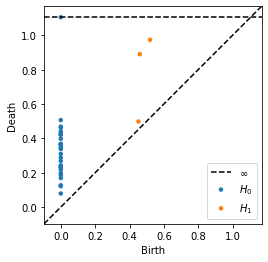

In [14]:
rips = Rips()
ripsdgms = rips.fit_transform(infty_pts)
rips.plot(ripsdgms)

### Comparing Persistence Diagrams - Bottleneck Distance

We can also plot both the Cech and Rips diagrams on the same plot:

Diagram plotting using `Persim`

<img src=https://persim.scikit-tda.org/en/latest/_static/logo.png width=120>

https://persim.scikit-tda.org/en/latest/

First, we transform the diagrams from the alpha complex stored in `alphadgms` into the format that we need.

In [15]:
zero_alpha_bars, one_alpha_bars = [], []
for bar in alphadgms:
    if bar[0] == 0:
        zero_alpha_bars.append(bar[1])
    elif bar[0] == 1:
        one_alpha_bars.append(bar[1])
        
alpha_diagrams = [np.array(zero_alpha_bars), np.array(one_alpha_bars)]

In [16]:
from persim import plot_diagrams
import matplotlib.pyplot as plt

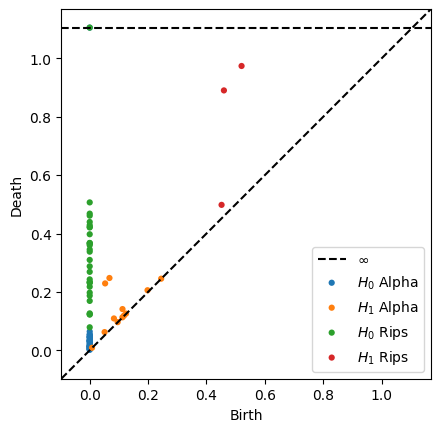

In [17]:
plot_diagrams(alpha_diagrams + ripsdgms, labels = ['$H_0$ Alpha', '$H_1$ Alpha', '$H_0$ Rips', '$H_1$ Rips'])

There are big differences! How can we measure exactly these? 
**Answer**: One option is to use the bottleneck distance

In [18]:
import persim

Now, we compare first dimensional persistence diagrams and plot the result.

In [19]:
distance_bottleneck, matching = persim.bottleneck(alpha_diagrams[1], ripsdgms[1], matching=True)
print("The bottleneck distance is: " + str(distance_bottleneck)[:7])

The bottleneck distance is: 0.22683


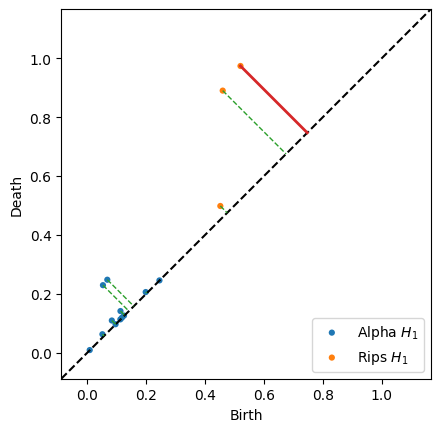

In [20]:
persim.bottleneck_matching(alpha_diagrams[1], ripsdgms[1], matching, labels=['Alpha $H_1$', 'Rips $H_1$'])
plt.show()

### Bottleneck distance Example 2

The previous example was not very illustrative. Let us consider a pair of infinity loops and compute their respective bottleneck distance.

In [21]:
infty_pts_a = tadasets.infty_sign(50, noise=0.08)
infty_pts_b = tadasets.infty_sign(30, noise=0.04)

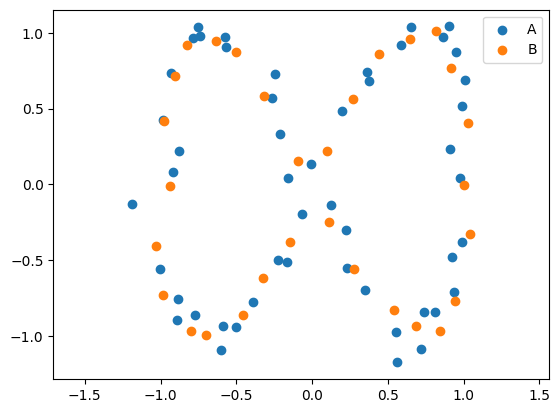

In [22]:
plt.scatter(infty_pts_a[:,0], infty_pts_a[:,1], label="A")
plt.scatter(infty_pts_b[:,0], infty_pts_b[:,1], label="B")
plt.axis('equal')
plt.legend()
plt.show()

Let us compute the Vietoris-Rips complex of both `A` and `B`

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


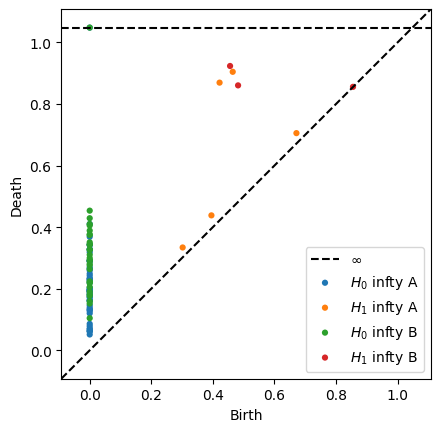

In [23]:
rips = Rips()
ripsdgms_a = rips.fit_transform(infty_pts_a)
ripsdgms_b = rips.fit_transform(infty_pts_b)
plot_diagrams(ripsdgms_a + ripsdgms_b, labels = ['$H_0$ infty A', '$H_1$ infty A', '$H_0$ infty B', '$H_1$ infty B'])

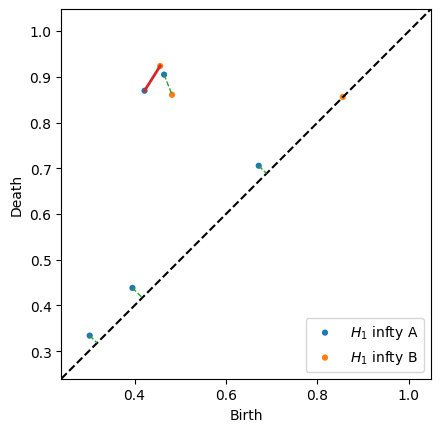

The bottleneck distance is: 0.05409


In [24]:
distance_bottleneck, matching = persim.bottleneck(ripsdgms_a[1], ripsdgms_b[1], matching=True)
persim.bottleneck_matching(ripsdgms_a[1], ripsdgms_b[1], matching, labels=['$H_1$ infty A', '$H_1$ infty B'])
plt.show()
print("The bottleneck distance is: " + str(distance_bottleneck)[:7])

Notice that if we rotate the point cloud `B`, there are no changes on either the persistence diagram, the bottleneck distance or the matchings.

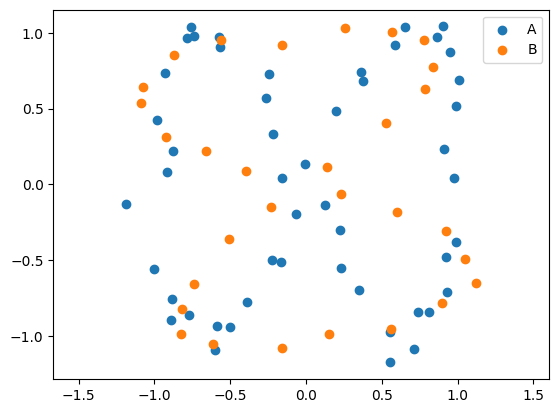

In [44]:
theta = 30
c, s = np.cos(theta), np.sin(theta)
infty_pts_b_R = np.matmul(np.array([[c, -s],[s, c]]), infty_pts_b.T).T 
plt.scatter(infty_pts_a[:,0], infty_pts_a[:,1], label="A")
plt.scatter(infty_pts_b_R[:,0], infty_pts_b_R[:,1], label="B")
plt.axis('equal')
plt.legend()
plt.show()

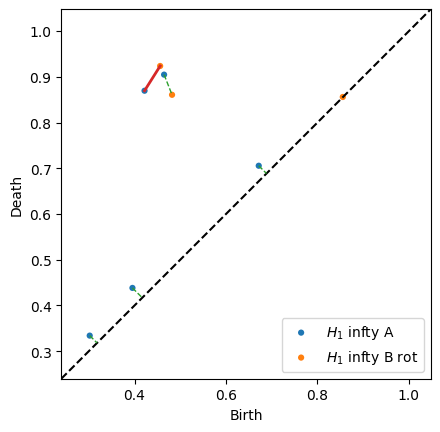

The bottleneck distance is: 0.05409


In [46]:
ripsdgms_b_R = rips.fit_transform(infty_pts_b_R)
distance_bottleneck, matching = persim.bottleneck(ripsdgms_a[1], ripsdgms_b_R[1], matching=True)
persim.bottleneck_matching(ripsdgms_a[1], ripsdgms_b_R[1], matching, labels=['$H_1$ infty A', '$H_1$ infty B rot'])
plt.show()
print("The bottleneck distance is: " + str(distance_bottleneck)[:7])

### Example 3 - Bottleneck vs Wassersetein Distance

Consider a pair of point clouds:
- `A` a sample around a unit circle
- `B` a sample around a 0.8 radius circle with `4` samples around `4` smaller circles.

> Indented block



In [42]:
circle_A = tadasets.dsphere(d=1, n=50, noise=0.3)
circle_B = np.vstack((
    0.8*tadasets.dsphere(d=1, n=40, noise=0.2),
    [1,1] + 0.2*tadasets.dsphere(d=1, n=12, noise=0.1),
    [1,-1] + 0.2*tadasets.dsphere(d=1, n=12, noise=0.1),
    [-1,-1] + 0.2*tadasets.dsphere(d=1, n=12, noise=0.1),
    [-1,1] + 0.2*tadasets.dsphere(d=1, n=12, noise=0.1)
))

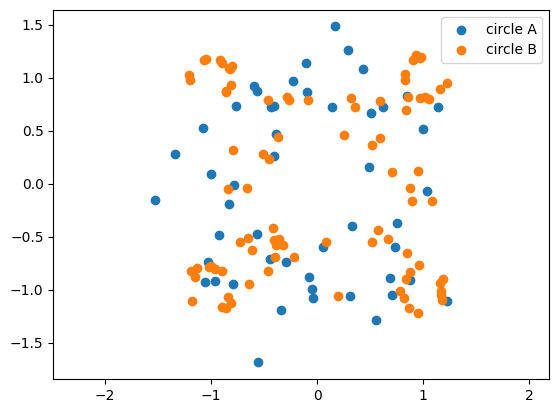

In [43]:
theta = 30
c, s = np.cos(theta), np.sin(theta)
infty_pts_b_R = np.matmul(np.array([[c, -s],[s, c]]), infty_pts_b.T).T 
plt.scatter(circle_A[:,0], circle_A[:,1], label="circle A")
plt.scatter(circle_B[:,0], circle_B[:,1], label="circle B")
plt.axis('equal')
plt.legend()
plt.show()

In [48]:
circle_A_phdgms = rips.fit_transform(circle_A)
circle_B_phdgms = rips.fit_transform(circle_B)

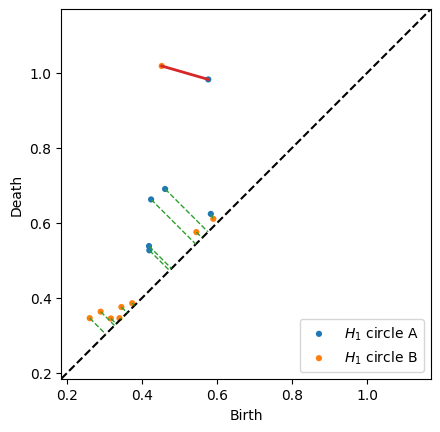

The bottleneck distance is: 0.12414


In [55]:
distance_bottleneck, matching = persim.bottleneck(circle_A_phdgms[1], circle_B_phdgms[1], matching=True)
persim.bottleneck_matching(circle_A_phdgms[1], circle_B_phdgms[1], matching, labels=['$H_1$ circle A', '$H_1$ circle B'])
plt.show()
print("The bottleneck distance is: " + str(distance_bottleneck)[:7])

In this example, the fact that the point sample `B` contains much more ''circles'' than `A` seems to be ignored. If we want to give more importance to the amount of nontrivial bars in Persistent Homology, we might use the Sliced Wasserstein Distance. (https://arxiv.org/abs/1706.03358)

The  Wasserstein distance is: 0.78275


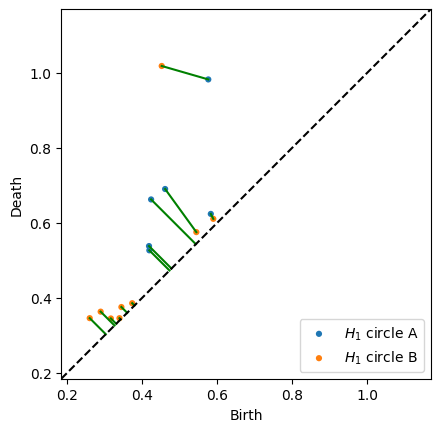

In [56]:
distance_wasserstein, matching = persim.wasserstein(circle_A_phdgms[1], circle_B_phdgms[1], matching=True)
persim.wasserstein_matching(circle_A_phdgms[1], circle_B_phdgms[1], matching, labels=['$H_1$ circle A', '$H_1$ circle B'])
print("The  Wasserstein distance is: " + str(distance_wasserstein)[:7])